In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"Admission_Predict_Ver1.1.csv")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


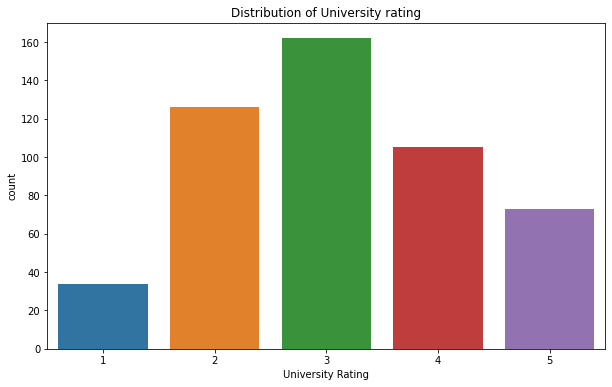

In [4]:
plt.figure(figsize=(10,6))
sns.countplot(x='University Rating',data=df)
plt.xlabel('University Rating')
plt.title('Distribution of University rating')
plt.show()

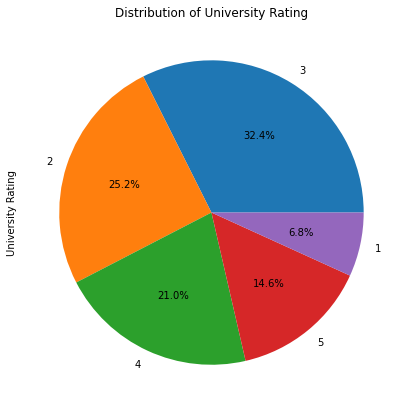

In [5]:
plt.title("Distribution of University Rating")
df['University Rating'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,7)) 
plt.show()

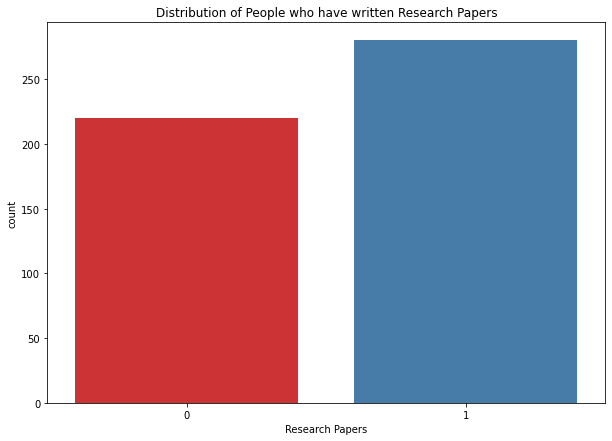

In [6]:
plt.figure(figsize=(10,7))
sns.countplot(x='Research',data=df,palette='Set1')
plt.title('Distribution of People who have written Research Papers')
plt.xlabel('Research Papers')
plt.show()

In [7]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [9]:
df['Research'] = df['Research'].astype(str).apply(lambda x: x.replace('.0',''))
df['University Rating'] =  df['University Rating'].astype(str).apply(lambda x: x.replace('.0',''))

In [10]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,SOP,LOR,CGPA,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.374000,3.48400,8.576440,0.72174
std,144.481833,11.295148,6.081868,0.991004,0.92545,0.604813,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.00000,6.800000,0.34000
25%,125.750000,308.000000,103.000000,2.500000,3.00000,8.127500,0.63000
50%,250.500000,317.000000,107.000000,3.500000,3.50000,8.560000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.00000,9.040000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.00000,9.920000,0.97000


In [11]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [12]:
df.drop(df.columns[[0, 4]], axis = 1, inplace = True)

In [13]:
df.sort_values(by=['CGPA'], inplace=True,ascending=False)
df

,GRE Score,TOEFL Score,University Rating,LOR,CGPA,Research,Chance of Admit
143,340,120,4,4.0,9.92,1,0.97
202,340,120,5,4.5,9.91,1,0.97
496,337,117,5,5.0,9.87,1,0.96
203,334,120,5,5.0,9.87,1,0.97
425,323,111,5,5.0,9.86,1,0.92
...,...,...,...,...,...,...,...
348,302,99,1,2.0,7.25,0,0.57
436,310,110,1,4.0,7.23,1,0.58
464,298,97,2,3.0,7.21,0,0.45
28,295,93,1,2.0,7.20,0,0.46


In [14]:
df.sample(5)

,GRE Score,TOEFL Score,University Rating,LOR,CGPA,Research,Chance of Admit
217,321,109,4,4.0,9.13,1,0.85
39,307,108,2,3.5,7.70,0,0.48
383,300,100,3,3.5,8.26,0,0.62
38,304,105,1,1.5,7.50,0,0.52
144,325,112,2,3.5,8.96,1,0.80


In [15]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1:]

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import random
from sklearn import metrics

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.2)

In [18]:
X_train.head()

,GRE Score,TOEFL Score,University Rating,LOR,CGPA,Research
147,326,114,3,3.0,9.11,1
196,306,105,2,2.5,8.26,0
394,329,111,4,4.0,9.23,1
404,311,101,3,2.5,7.64,1
148,339,116,4,3.5,9.80,1


In [19]:
lr = LinearRegression()

In [20]:
lr.fit(X_train,y_train)

LinearRegression()

In [21]:
y_pred = lr.predict(X_test)

In [22]:
X_test

,GRE Score,TOEFL Score,University Rating,LOR,CGPA,Research
69,328,115,4,4.0,9.16,1
132,309,105,5,3.5,8.56,0
439,312,105,2,3.0,8.46,0
463,304,107,3,3.0,7.86,0
408,297,101,3,4.0,7.67,1
...,...,...,...,...,...,...
461,301,102,3,2.0,8.13,1
5,330,115,5,3.0,9.34,1
412,314,102,4,2.0,7.88,1
46,329,114,5,5.0,9.30,1


In [23]:
y_test.head()

,Chance of Admit
69,0.78
132,0.71
439,0.66
463,0.57
408,0.57


In [24]:
from sklearn.metrics import r2_score

In [25]:
print("Accuracy of the model is",r2_score(y_test,y_pred))

Accuracy of the model is 0.8182335188210756


In [26]:
user_input = [[333,118,5,5.0,9.04,1]]
user_pred = lr.predict(user_input)
print((user_pred.flatten()*100).astype(float))

[88.74291142]


In [27]:
import pickle

In [28]:
pickle.dump(lr,open('model1.pkl','wb'))